In [13]:
options(warn = -1)

# Wpływ obostrzeń na rozwój pandemii
## Zbiory danych
Przejrzeliśmy dane COVID-19 na świecie oraz dane ze strony [bsg.ox.ac.uk](https://www.bsg.ox.ac.uk/).
COVID-19 na świecie - informacje które nam się przydadzadzą z tej ramki danych to kolumny zawierające:
* Liczbę nowych przypadków
* Liczbę wszystkich przypadków
* Procent pozytywnych testów
* Indeks stopnia wprowadzonych zaostrzeń
* Wskaźnik redystrybucji

Druga ramka danych jest dokładnie opisana w tym miejscu: 
[codebook](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md). Aktualnie zainteresowały nas informacje o:
* C1_School closing
* C4_Restrictions on gatherings
* H2_Testing policy
* H6_Facial Coverings

In [14]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(tidyr) 
library(patchwork)
library(viridis)
library(ggthemes)


theme_set(theme_minimal())
Sys.setlocale("LC_TIME", "C") # żeby daty były po angielsku

options(repr.plot.width = 20, repr.plot.height = 10) # rozmiar wykresów

df <- read.csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv")
df1 <- read.csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
countries <- c("Poland", "Sweden", "Czech Republic")
colormap <- c("red", "dark green", "blue", "purple", "orange")

rest <- df %>%
        filter(CountryName %in% countries) %>%
        mutate(Date = as.Date(as.character(Date), "%Y%m%d"))

general <- df1 %>%
           filter(location %in% countries) %>%
           mutate(date = as.Date(date))

[1] "C"

## Cel
Naszym głównym celem jest porównanie trzech państw, które stosują różne polityki zaostrzeń. Na tej podstawie chcemy sprawdzić, jak niektóre obostrzenia wpływają na rozwój pandemii w tych krajach. Do porównania użyliśmy trzech państw (które na wykresach są oznaczone kolorami):
* Polski (zielony),
* Szwecji (niebieski),
* Czech (czerwony).

## Pytania/tezy
### Jaki wpływ ma stopień zaostrzeń na liczbę nowych przypadków?

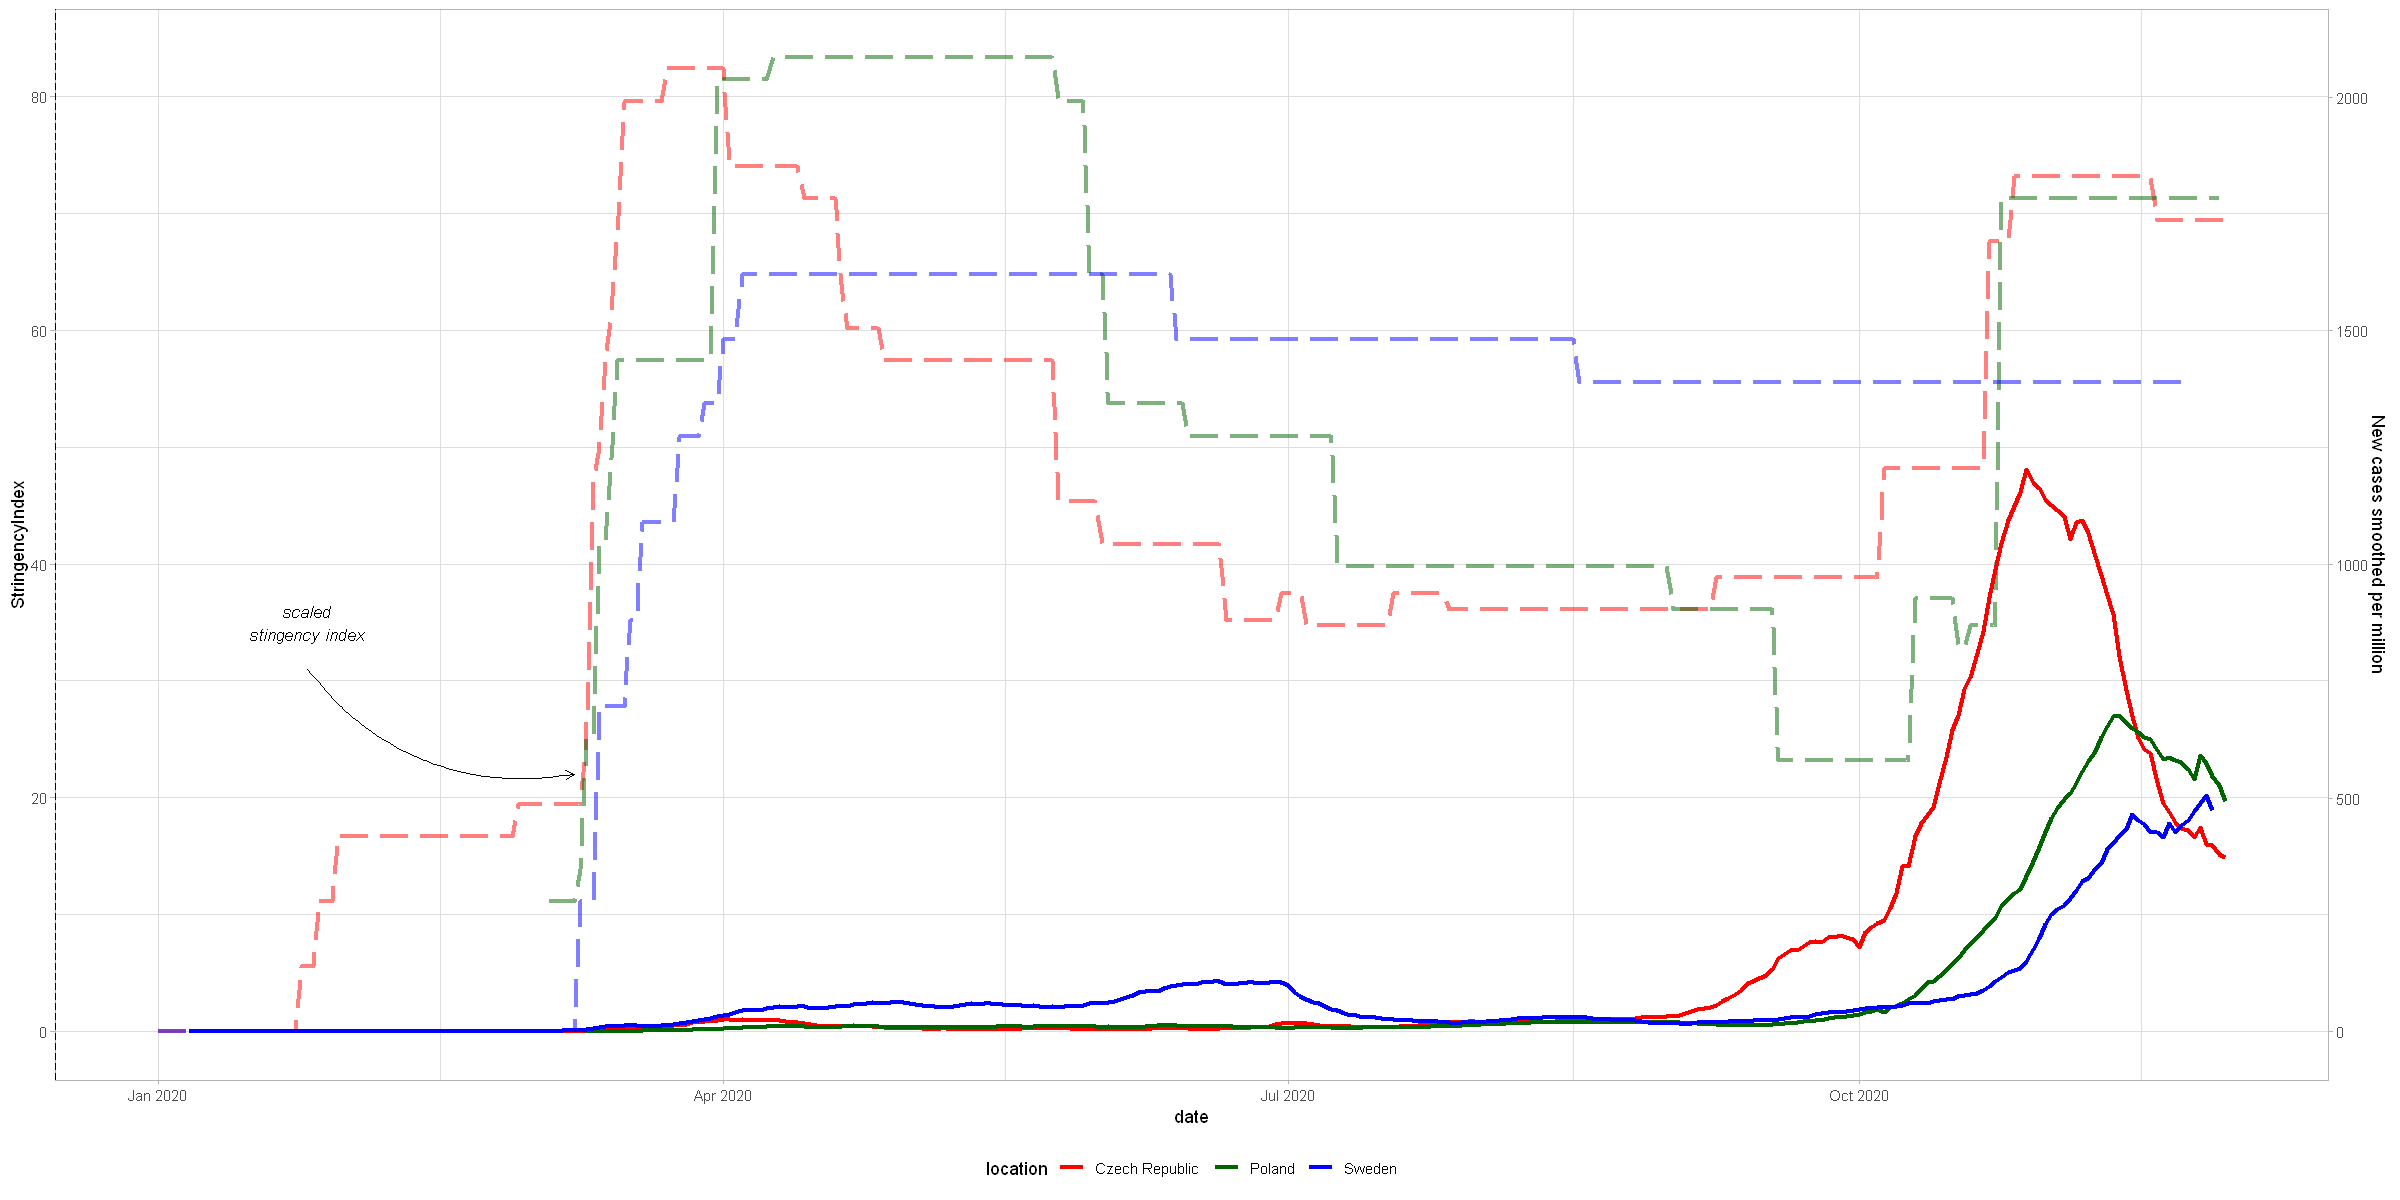

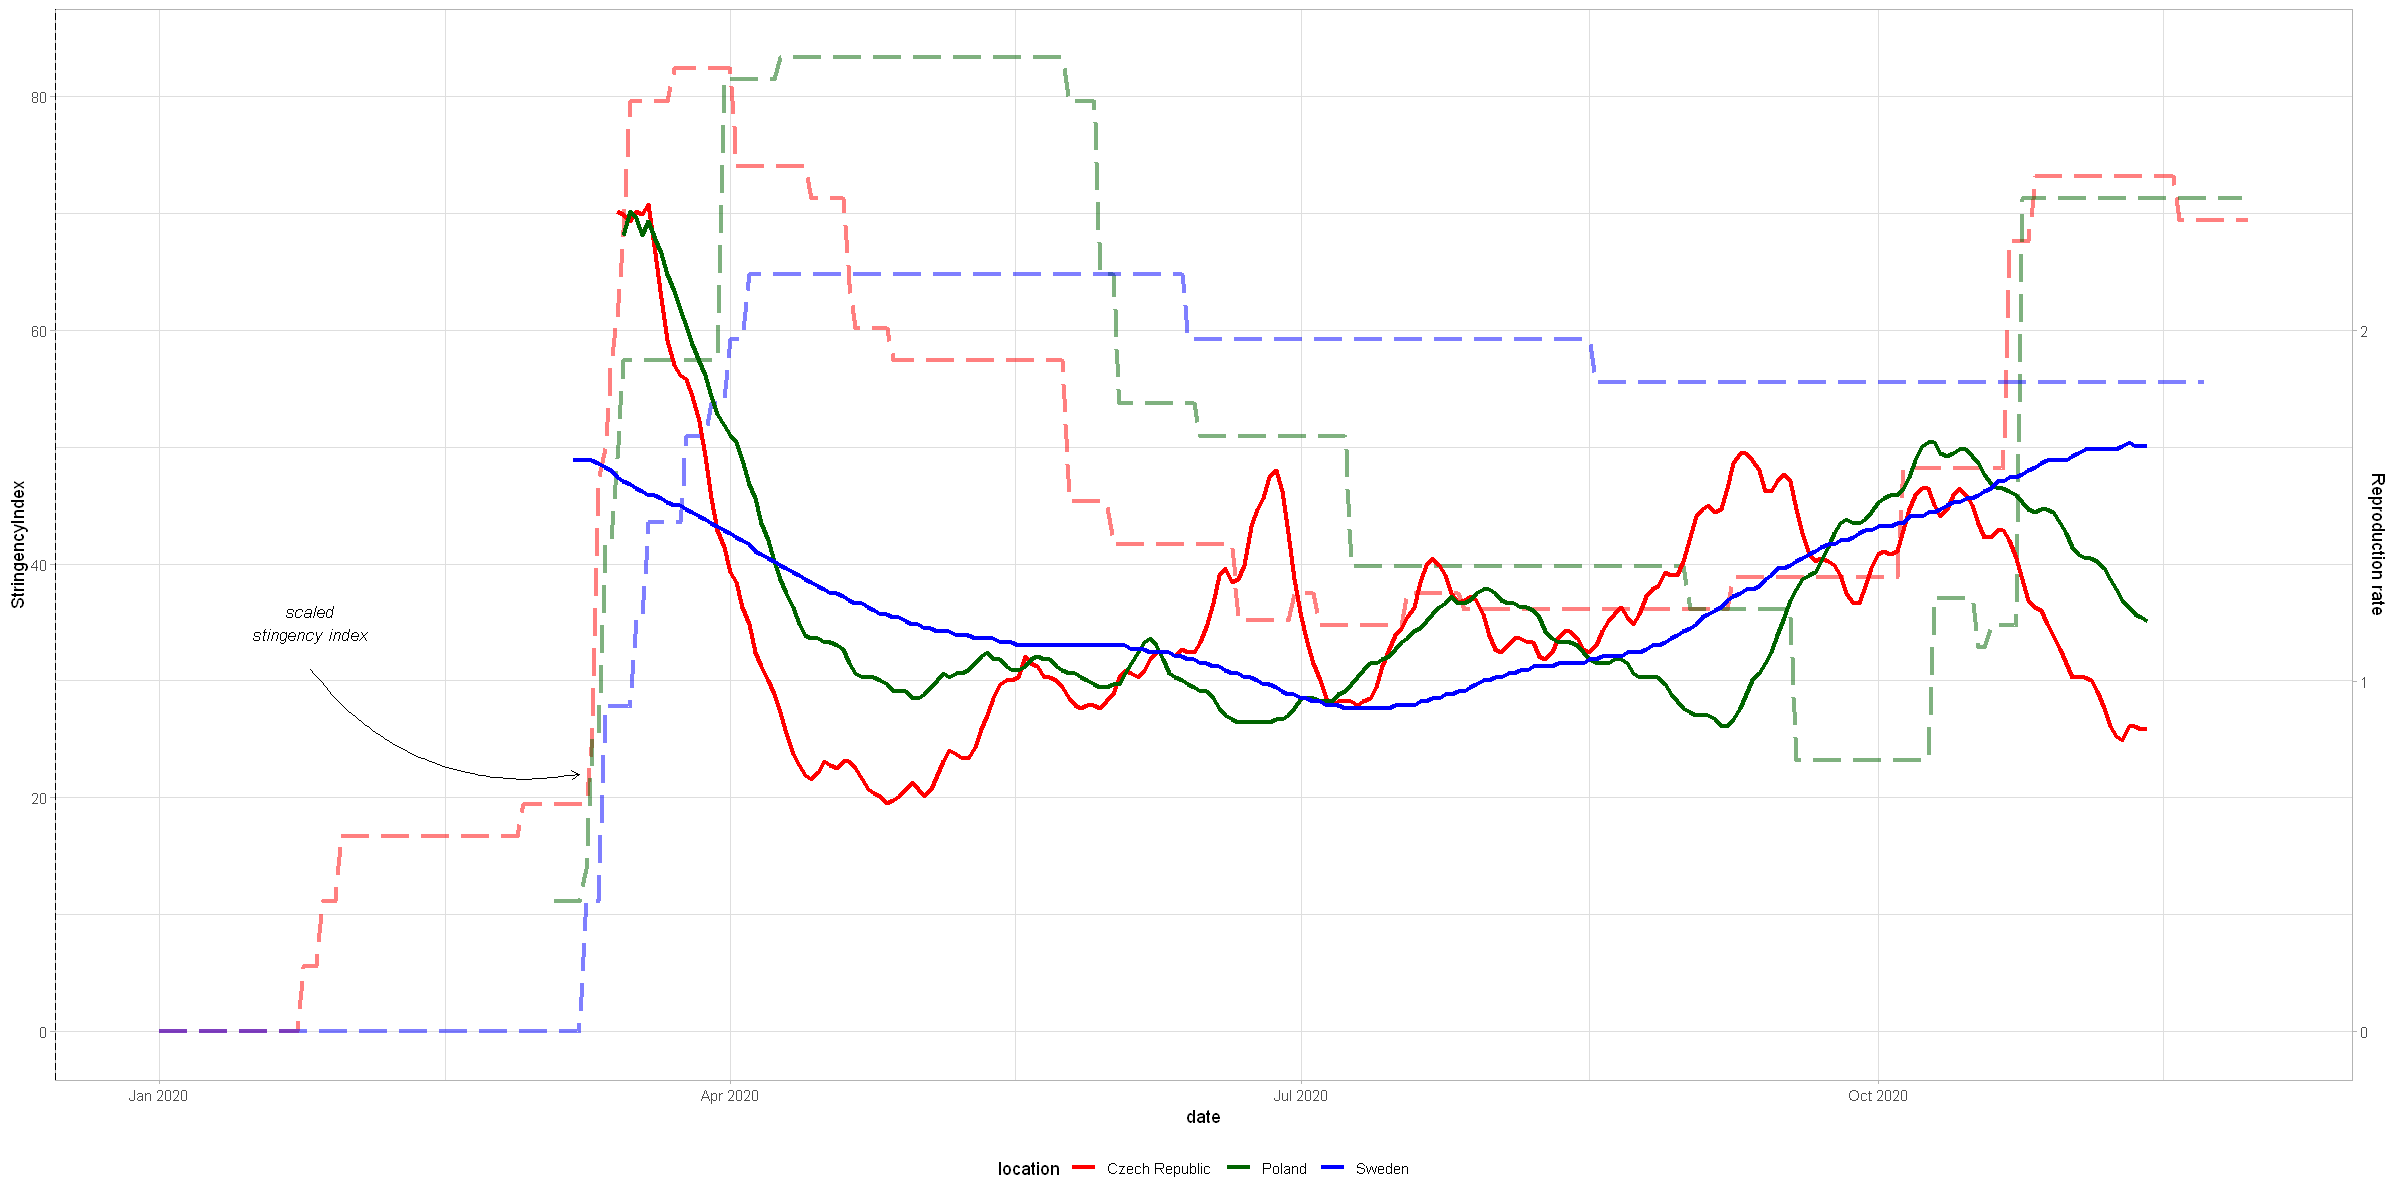

In [22]:
connected <- inner_join(general %>% select(location, date, new_cases_smoothed_per_million, reproduction_rate), 
                       rest %>% select(CountryName, Date, StringencyIndex), 
                       by = c("location" = "CountryName", "date" = "Date"))

coeff <- 25
ggplot(connected, aes(x = date)) +
    scale_x_date() +
    geom_line(aes(y = StringencyIndex, fill = location, color = location), linetype = "longdash", size = 1.3, alpha = 0.5) +
    annotate(geom = "curve", x = as.Date("2020-01-25"), y = 31, 
             xend = as.Date("2020-03-8"), yend = 22, 
             curvature =0.3, arrow = arrow(length = unit(2, "mm"))) +
    annotate(geom = "text", x = as.Date("2020-01-25"), y = 35,
             label = format("scaled\nstingency index"), hjust = "center", size=3.5,
             fontface='italic') +
    geom_line(aes(y = new_cases_smoothed_per_million/coeff, color = location), size = 1.3) +
    scale_color_manual(values = colormap) +
    scale_y_continuous(name = "StringencyIndex",
                      sec.axis = sec_axis(~.*coeff, name = "New cases smoothed per million")) +
    theme_light()+
    theme(axis.line.y.left = element_line(linetype =  "longdash"),
         legend.position = "bottom")

coeff <- 30
ggplot(connected, aes(x = date)) +
    scale_x_date() +
    geom_line(aes(y = StringencyIndex, fill = location, color = location), linetype = "longdash", size = 1.3, alpha = 0.5) +
    annotate(geom = "curve", x = as.Date("2020-01-25"), y = 31, 
             xend = as.Date("2020-03-8"), yend = 22, 
             curvature =0.3, arrow = arrow(length = unit(2, "mm"))) +
    annotate(geom = "text", x = as.Date("2020-01-25"), y = 35,
             label = format("scaled\nstingency index"), hjust = "center", size=3.5,
             fontface='italic') +
    geom_line(aes(y = reproduction_rate*coeff, color = location), size = 1.3) +
    scale_y_continuous(name = "StringencyIndex",
                      sec.axis = sec_axis(~./coeff, name = "Reproduction rate")) +
    scale_color_manual(values = colormap) +
    theme_light()+
    theme(axis.line.y.left = element_line(linetype =  "longdash"),
         legend.position = "bottom")



### Wniosek
Z pierwszego wykresu wynika, że Szwecja, która w okresie kwietnia-czerwca miała najmniej zaostrzeń (nie wprowadziła pełnego lockdownu), miała w tym okresie najwyższy przyrost zachorowań. Z tego powodu zapewne w trakcie wakacji (czerwiec - paździenik) nie obniżyła ona tak obostrzeń jak Polska i Czechy. Skutkiem zmniejszenia obostrzeń w tych krajach w okresie wakacyjnym jest wzrost zakażeń od początku października i zaostrzenie obostrzeń, gdzie w Szwecji sytuacja nie uległa tak drastycznym zmianom.

## Zamknięcie szkół, a liczba przypadków
Do prezentacji tego użyliśmy dwóch wykresów zależności w jednym sprawdzaliśmy ilość nowych przypadków wygładzoną, a w drugim wskaźnik reprodukcji, który mówimy nam ile potencjalnych osób może zarazić osobą zakażona wirusem.

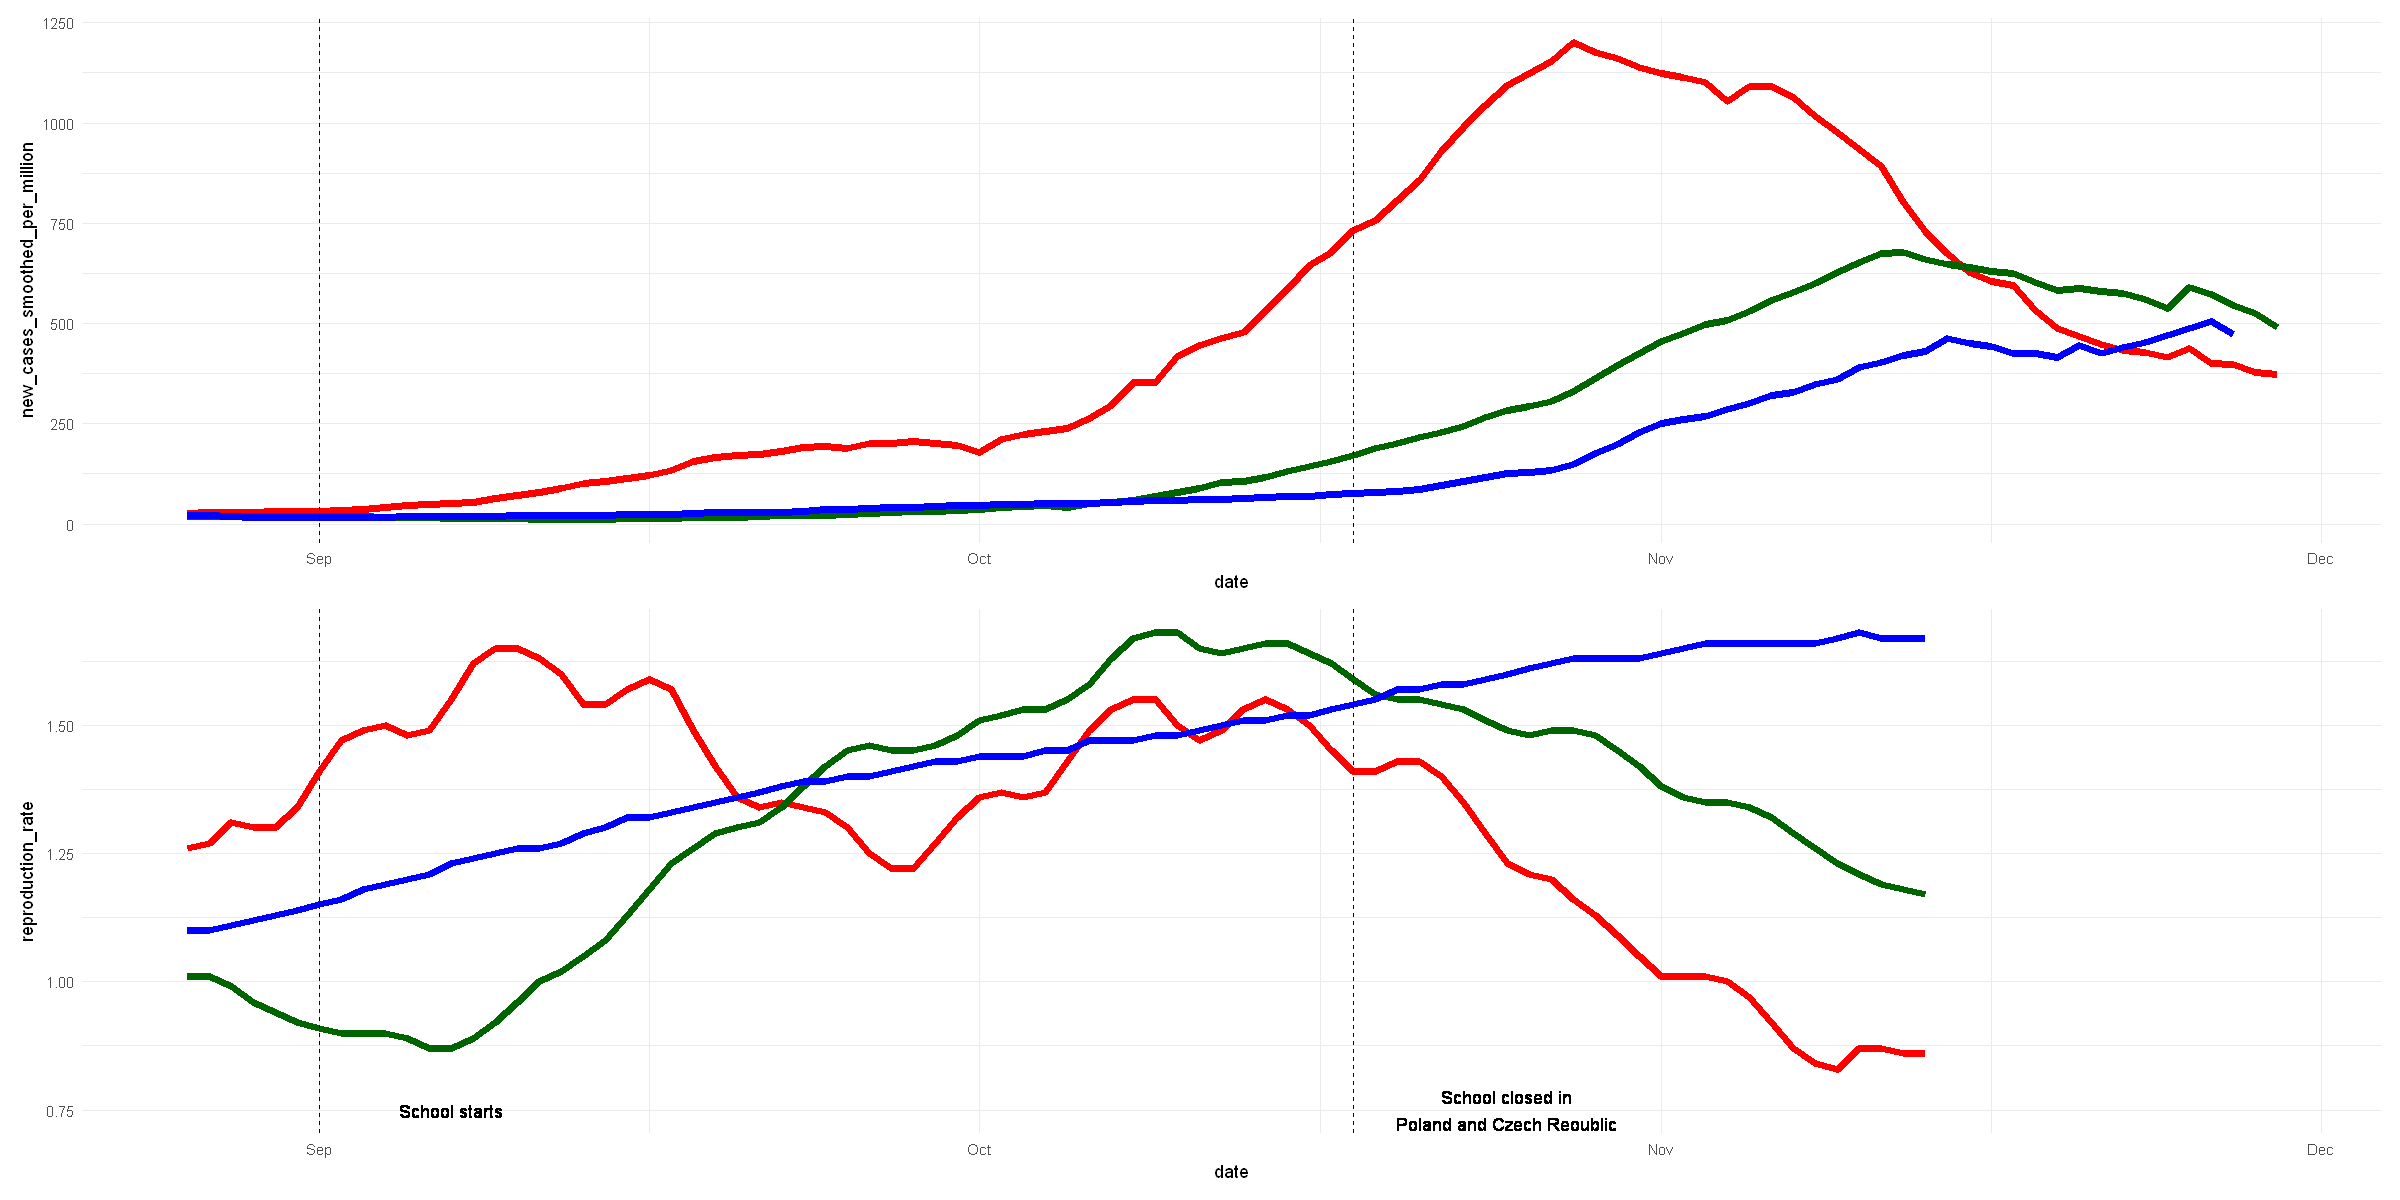

In [16]:
p1 <- ggplot(general[general$date > "2020-08-25", ], aes(x = date, y = new_cases_smoothed_per_million, color = location)) +
    geom_line(size = 2) +
    scale_color_manual(values = colormap) +
    geom_vline(xintercept = as.numeric(as.Date("2020-09-01")), linetype = "dashed") + 
    geom_vline(xintercept = as.numeric(as.Date("2020-10-18")), linetype = "dashed") + 
    theme(legend.position = "none")
        

p2 <- ggplot(general[general$date > "2020-08-25", ], aes(x = date, y = reproduction_rate, color = location)) +
    geom_line(size = 2) +
    scale_color_manual(values = colormap) +
    geom_vline(xintercept = as.numeric(as.Date("2020-09-01")), linetype = "dashed") + 
    geom_vline(xintercept = as.numeric(as.Date("2020-10-18")), linetype = "dashed") +
    geom_text(aes(x = as.Date("2020-09-07", "%Y-%m-%d"), label="School starts", y=0.75), colour="black") + 
    geom_text(aes(x = as.Date("2020-10-25", "%Y-%m-%d"), label="School closed in\nPoland and Czech Reoublic", y=0.75), colour="black") +
    theme(legend.position = "none")

p1/p2

### Wniosek
Z wykresów wynika, że po zamknięciu szkół zarówno w Polsce jak i w Czechach wskaźnik reprodukcji wirusa zmalał, co jest zauważalne na górnym wykresie spadkiem zachorowań po pewnym okresie. Natomiast w Szwecji, gdzie szkół nie zamknięto wzrósł wskaźnik reprodukcji, jak i przyrost dzienny nowych przypadków.

## Jaki jest wpływ noszenia maseczek na rozwój pandemii?

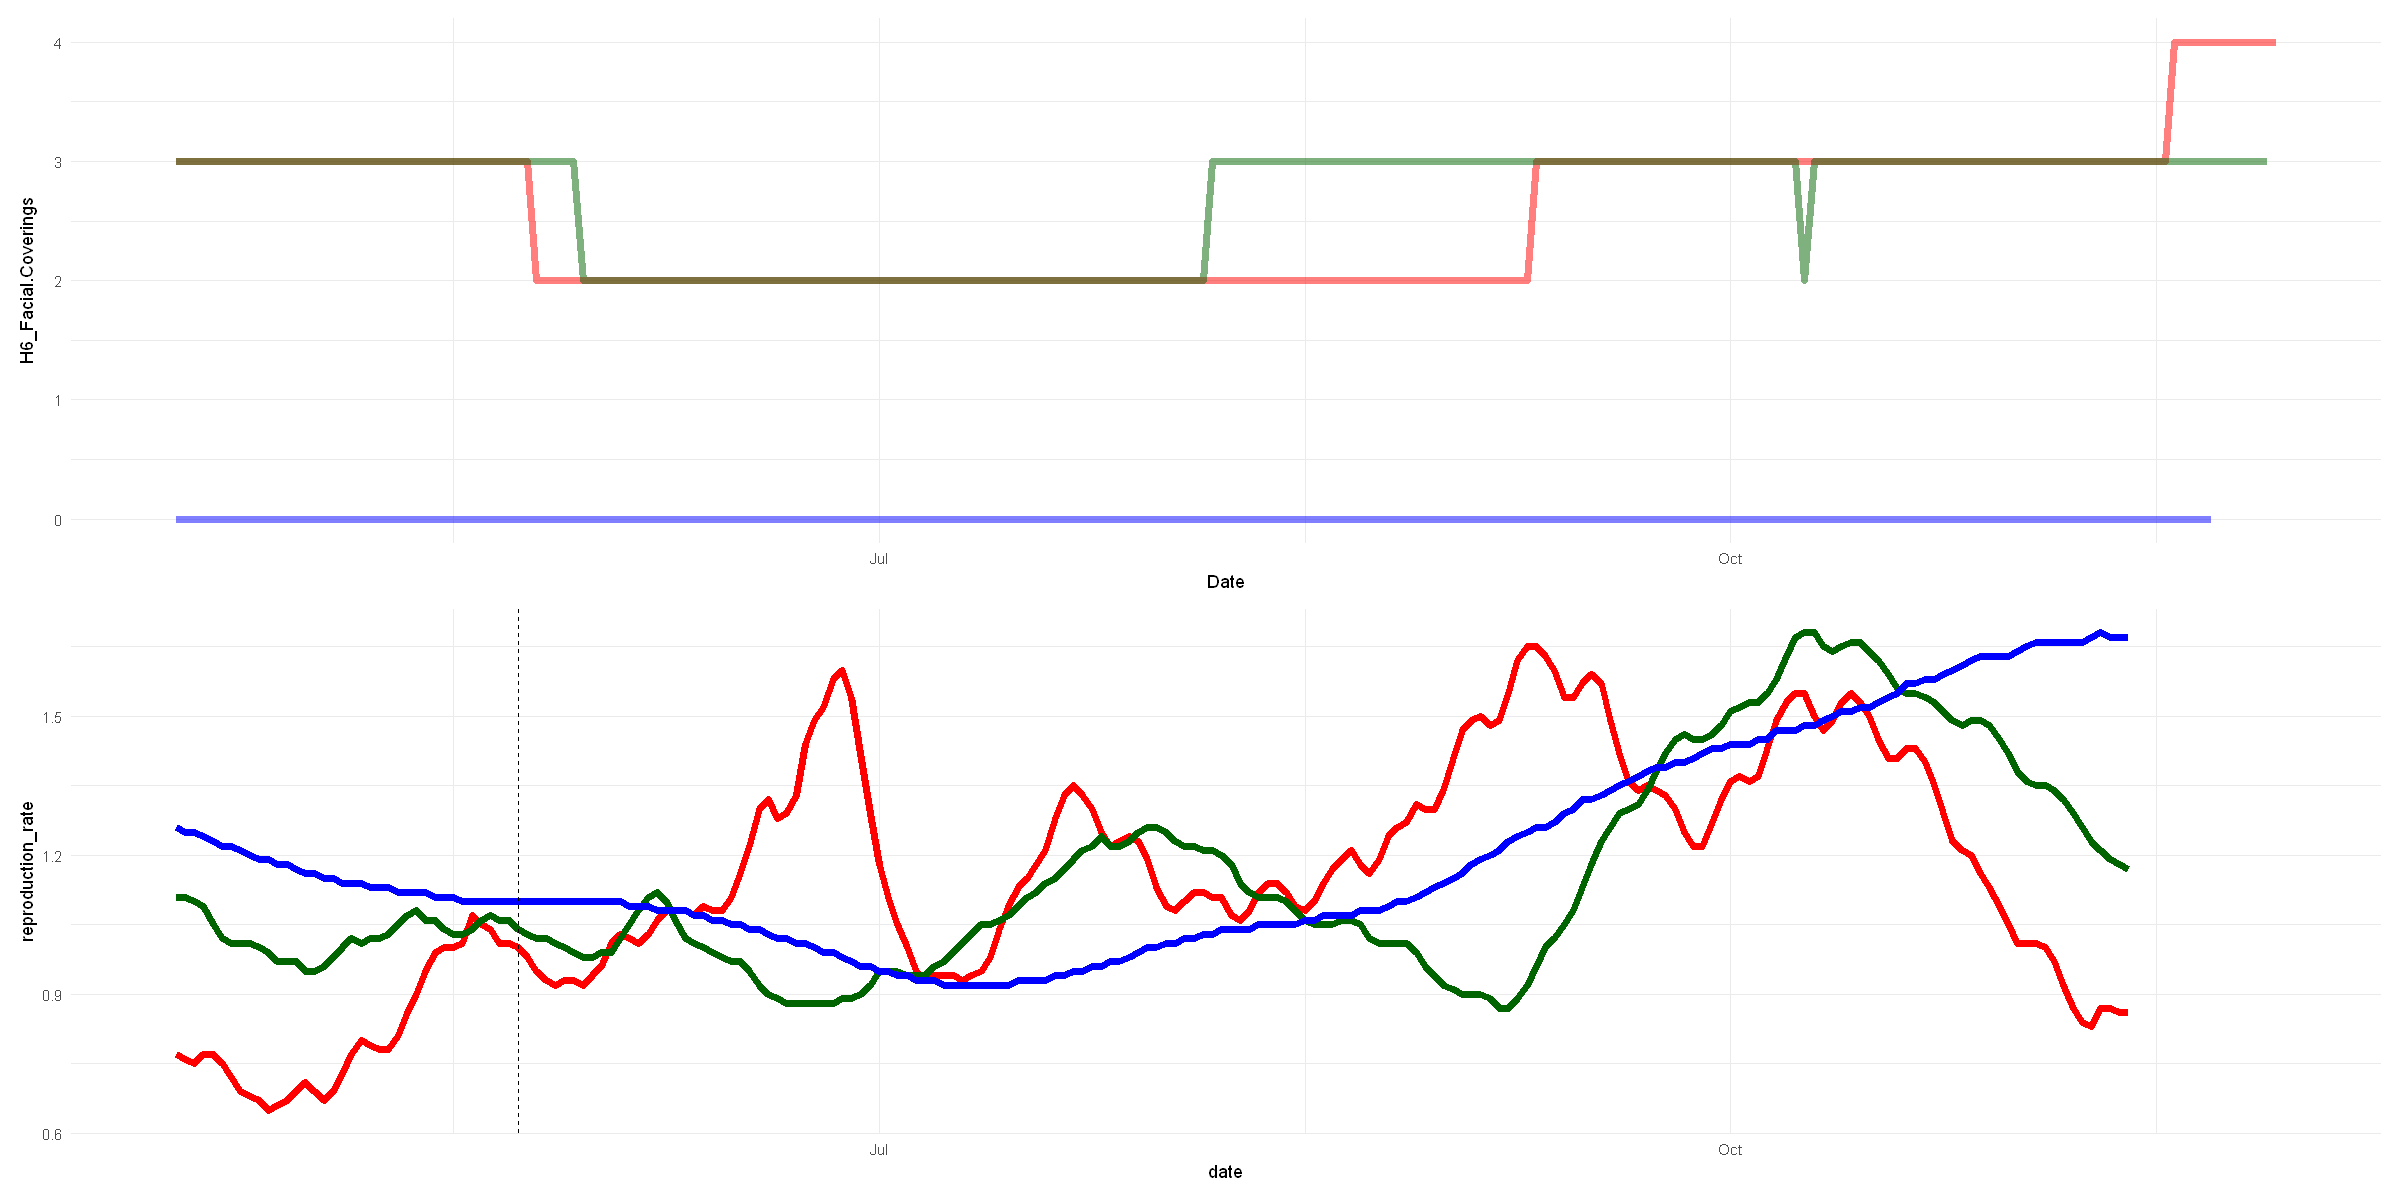

In [17]:
p1 <- ggplot(rest[rest$Date > "2020-04-15", ], aes(x = Date, y = H6_Facial.Coverings, color = CountryName)) +
    geom_line(size = 2, alpha = 0.5) +
    scale_color_manual(values = colormap) +
    theme(legend.position = "none")

p2 <- ggplot(general[general$date > "2020-04-15", ], aes(x = date, y = reproduction_rate, color = location)) +
    geom_line(size = 2) +
    geom_vline(xintercept = as.numeric(as.Date("2020-05-23")), linetype = "dashed") +
    scale_color_manual(values = colormap) +
    theme(legend.position = "none")

p1/p2

### Wniosek
Ciężko zauważyć wpływ noszenia maseczek na reprodukcję wirusa, ponieważ wykres Szwedów, którzy nie wprowadzili żadnego nakazu noszenia, nie różni się znacząco od wykresu dla Polski, czy Czech. Możemy zauważyć, że po wprowadzeniu 3 czyli wymagania noszenia maseczek w miejscach publicznych albo wszędzie tam gdzie nie da się zachować dystansu społecznego, widzimy bardziej skokowy charakter wykresów.

## Polityka testowania, a procent pozytywnych testów

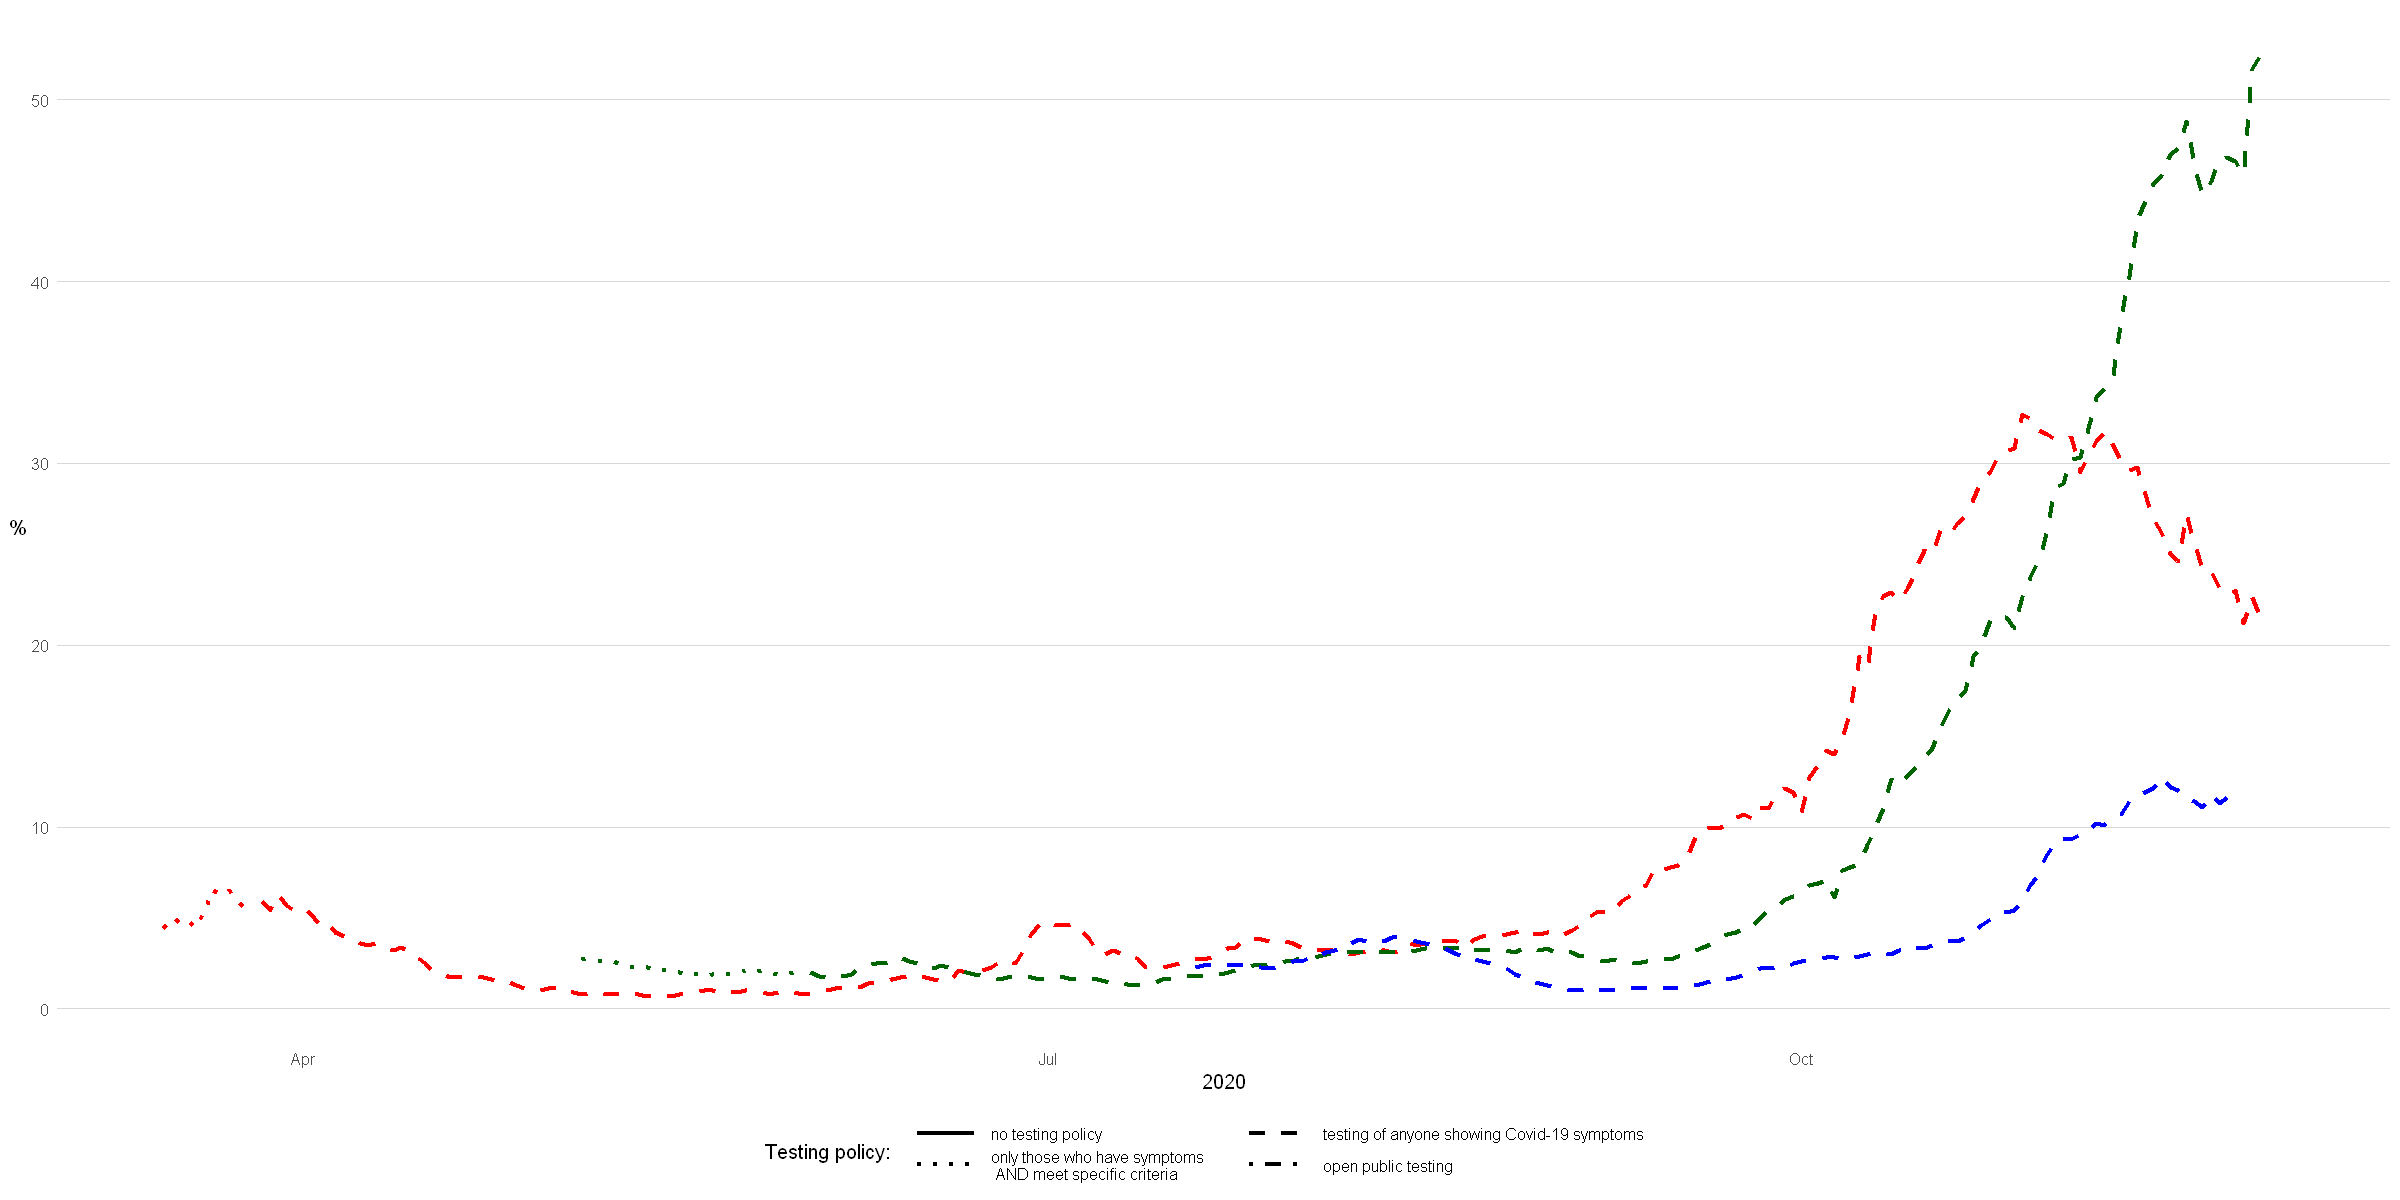

In [18]:
ourdata <- inner_join(general %>% select(location, date, new_cases_per_million, 
                                         reproduction_rate, positive_rate), 
                       rest %>% select(CountryName, Date, StringencyIndex, H6_Facial.Coverings, 
                                       C1_School.closing, C4_Restrictions.on.gatherings, H2_Testing.policy), 
                       by = c("location" = "CountryName", "date" = "Date"))


ourdata$location <- factor(ourdata$location,
                          levels = c('Czech Republic', 'Poland', 'Sweden'),
                          labels = c('Czech Republic', 'Poland', 'Sweden'))

ourdata$H2_Testing.policy <- factor(ourdata$H2_Testing.policy,
                                   exclude = NULL,
                                   levels = c(0:3, NA) ,
                                   labels = c(
                                        "no testing policy",
                                        format("only those who have symptoms\n AND meet specific criteria"),
                                        "testing of anyone showing Covid-19 symptoms",
                                        "open public testing",
                                        "no data"))

ggplot(ourdata %>% filter(date >= "2020-03-15"), aes(x = date, color = location)) + 
    scale_x_date() +
    geom_line(size = 1.3,aes(y=positive_rate*100,
                           linetype = H2_Testing.policy)) +
    labs(linetype = "Testing policy: ",
       y="%", x="2020",
       colour = "Country: ") +
    guides(linetype = guide_legend(keywidth = unit(1.5, 'cm'), order=0, nrow=2), colour = "none") +  
    scale_linetype_manual(values = c("no testing policy"="solid",
                                   "only those who have symptoms\n AND meet specific criteria"="dotted",
                                   "testing of anyone showing Covid-19 symptoms"="dashed",
                                   "open public testing"="dotdash",
                                   'no data'='blank'),
                        limits = c('no testing policy',
                                   format("only those who have symptoms\n AND meet specific criteria"),
                                   "testing of anyone showing Covid-19 symptoms",
                                   'open public testing')) +
    scale_color_manual(values = colormap)+
    theme_hc() + 
    theme(legend.position="bottom", legend.box = "vertical",
        axis.title.y = element_text(angle=0, vjust=0.5))


### Wniosek
Na wykresie jest za mało danych, żeby wyciągnać sensowne wnioski, ponieważ wszystkie kraje przez prawie cały okres stosowały tą samą politykę testowania. Można jedynie powiedzieć, że Polska w ostatnim okresie ma stosunkową duża wykrywalność potwierdzonych zakażeń w porównaniu do dwóch pozostałych państw.

## Wpływ ograniczeń dotyczących zgromadzeń na liczbę przypadków. 

In [19]:
ourdata$C4_Restrictions.on.gatherings = factor(ourdata$C4_Restrictions.on.gatherings,
                                               exclude = NULL,
                                               levels = c(0:4, NA),
                                               labels = c(
                                                 'no restrictions',
                                                 'above 1000 people',
                                                 'between 101-1000 people',
                                                 'between 11-100 people',
                                                 'of 10 people or less',
                                                 'no data'
                                               ))



segment <- 1


for (i in 2:nrow(ourdata)) {
  if (ourdata$location[i]==ourdata$location[i-1] 
      && ourdata$C4_Restrictions.on.gatherings[i]==ourdata$C4_Restrictions.on.gatherings[i-1]) {
    segment[i] <- segment[i-1]
  } else {
    segment[i] <- segment[i-1] + 1
  }
}
ourdata$segment <- segment

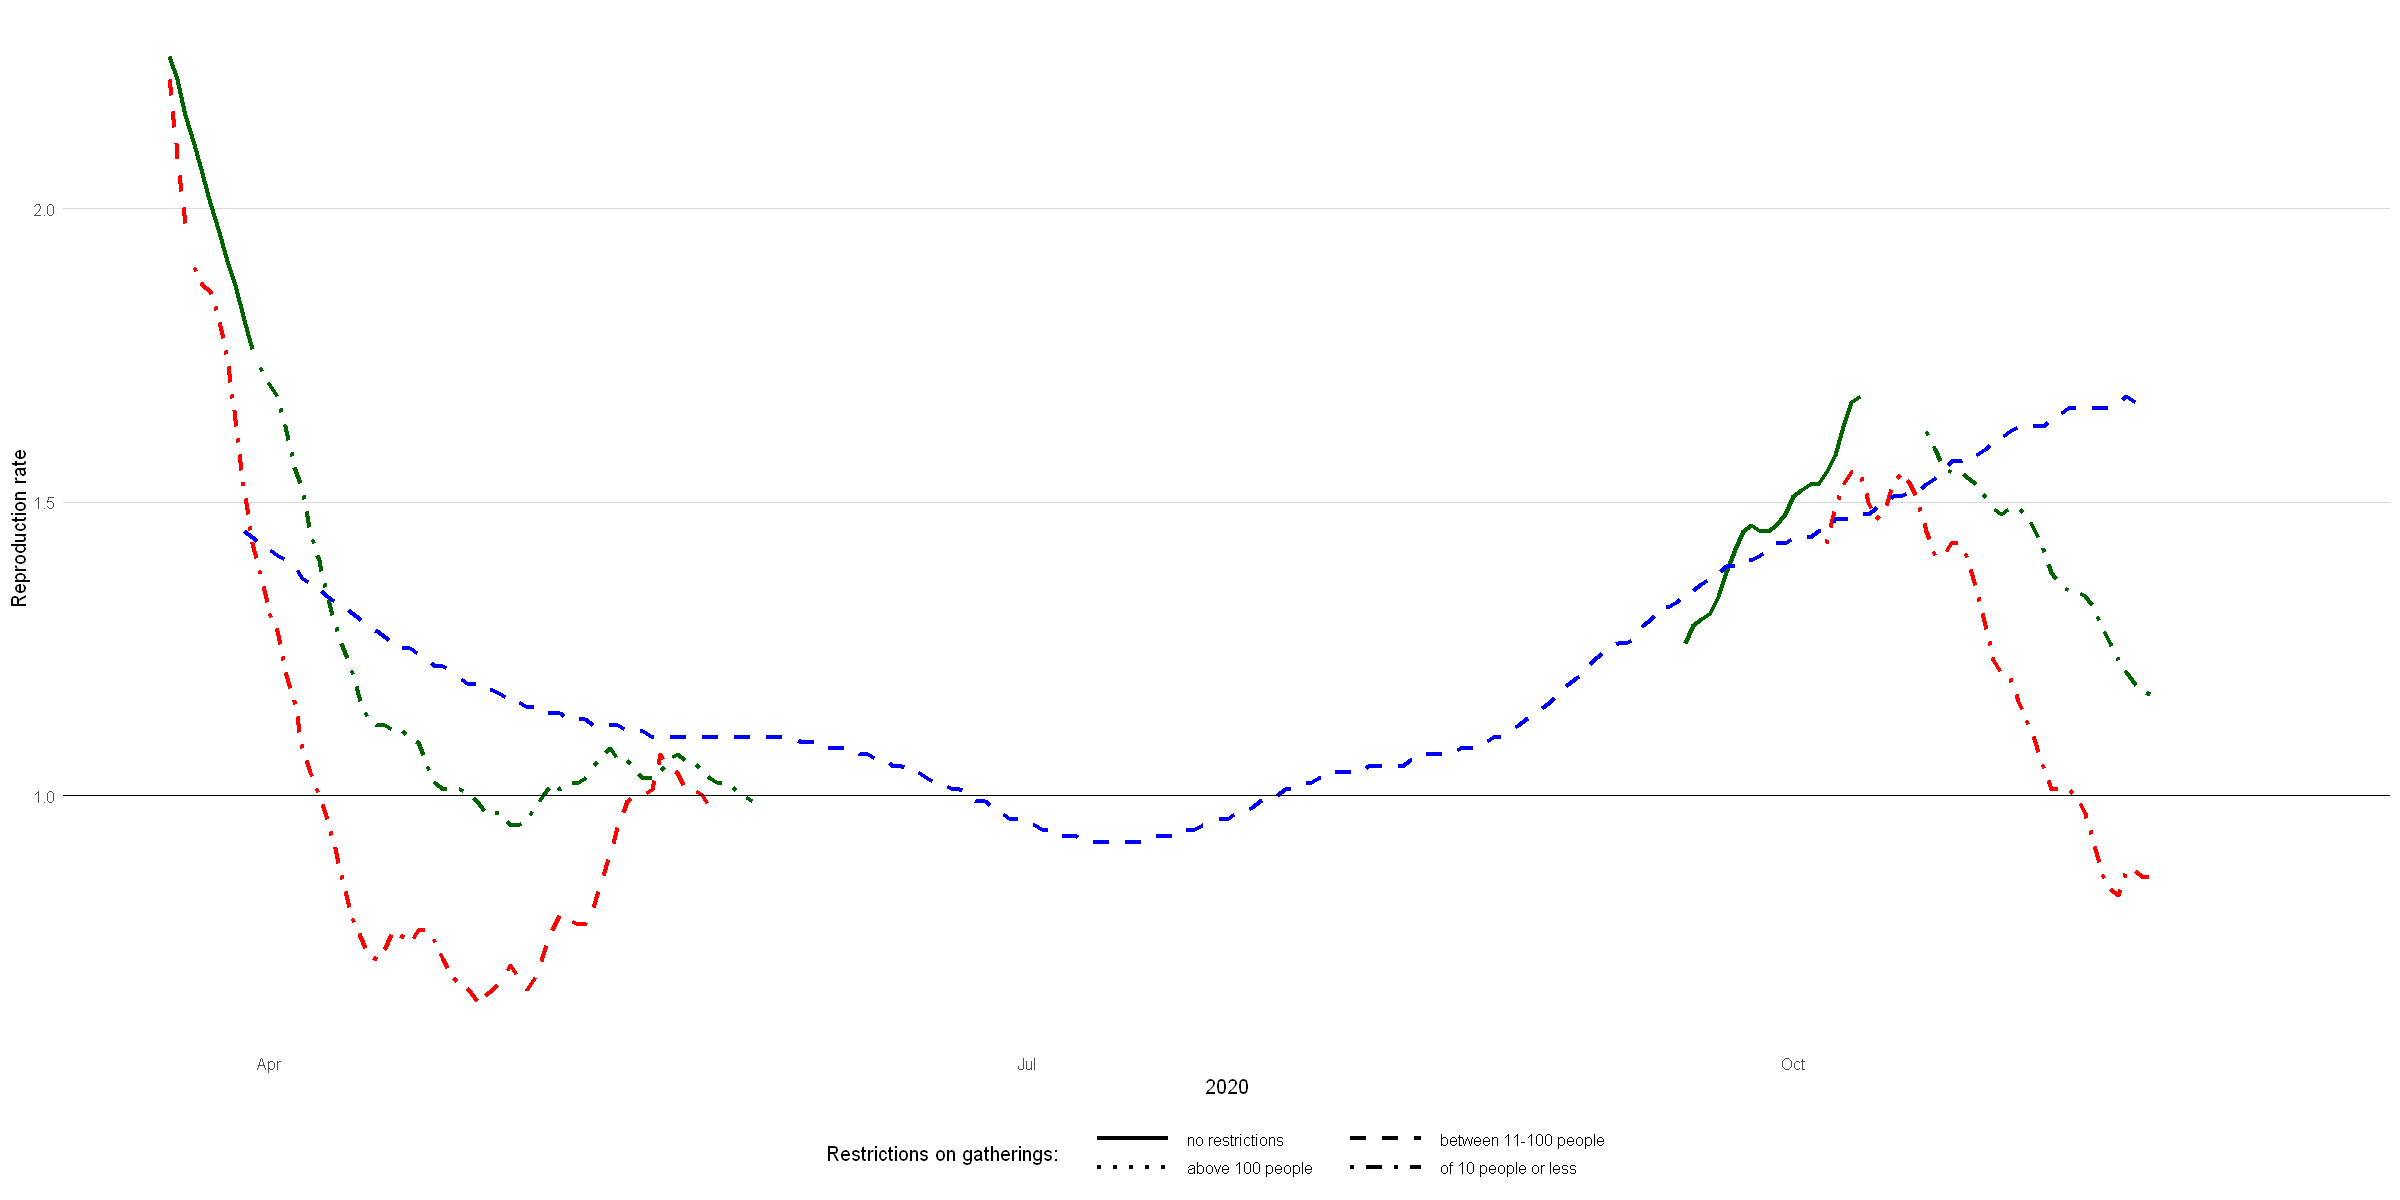

In [20]:
ggplot(ourdata %>% filter(date >= "2020-03-20"),aes(x = date, color = location)) + 
  geom_line(aes(y=reproduction_rate,
                linetype = C4_Restrictions.on.gatherings,
                group=segment), size=1.3) +
  geom_hline(yintercept = 1) + # mozna pomyslec czy to dodac
  scale_x_date() +
  labs(linetype = "Restrictions on gatherings: ",
       color = "Country: ",
       y=format("Reproduction rate"), x="2020") +
  scale_linetype_manual(
    values = c('no restrictions'='solid', 
               'above 100 people'='dotted', 
               'between 11-100 people'='dashed',
               'of 10 people or less'='dotdash',
               'no data'='blank'
               ),
    limits = c('no restrictions', 'above 100 people',
               'between 11-100 people', 'of 10 people or less')) +
  scale_color_manual(values = colormap) +
  guides(linetype = guide_legend(keywidth = unit(1.9, 'cm'), nrow=2), color = "none") +
  theme_hc() + 
  theme(legend.position="bottom", legend.box = "vertical",
        axis.title.y = element_text(angle = 90))

## Wnioski
Na wykresie może zaobserwować spadek reprodukcji, w momencie kiedy zostało wprowadzone ograniczenie spotkań do mniej niż 10 osób w przypadku Polski i Czech. Zauważmy, że dla Szwecji, która ciągle ma wprowadzone obostrzenie występuje nieduża różnica w reprodukcji wirusa pomiędzy ograniczeniem zgromadzeń od 11-100 ludzi, a ograniczeniem wprowadzonym w Polsce i Czechach.